Visualization
Univariate
Multivariate
Time series
Correlation

In [1]:
import pandas as pd
import csv

In [2]:
with open("all_data.csv", "r", encoding='utf-8-sig') as f:
    df = csv.reader(f)
    diction = {'Country':[], 'Year':[], 'Life expectancy at birth':[], 'GDP':[]}
    df_out = pd.DataFrame(diction)
    for i in df:
        df_out.loc[len(df_out.index)] = i
    df_out = df_out.drop(0)

In [3]:
df_out

,Country,Year,Life expectancy at birth,GDP
1,Chile,2000,77.3,77860932152
2,Chile,2001,77.3,70979923960
3,Chile,2002,77.8,69736811435
4,Chile,2003,77.9,75643459840
5,Chile,2004,78,99210392858
...,...,...,...,...
92,Zimbabwe,2011,54.9,12098450749
93,Zimbabwe,2012,56.6,14242490252
94,Zimbabwe,2013,58,15451768659
95,Zimbabwe,2014,59.2,15891049236


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_out['Life expectancy at birth'] = df_out['Life expectancy at birth'].astype(float)
df_out['GDP'] = df_out['GDP'].astype(float) / 1000000000

In [53]:
countries = df_out.Country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

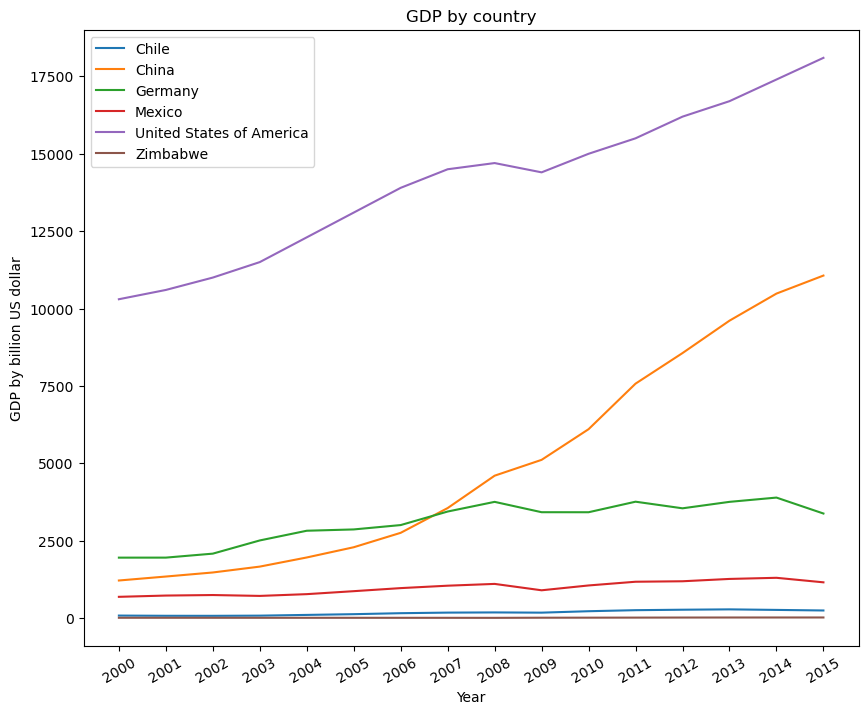

In [12]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df_out)
plt.xticks(rotation=30)
plt.ylabel('GDP by billion US dollar')
plt.title('GDP by country')
plt.legend(loc='upper left')
plt.show()

GDPs of Germany, China, and the USA increased significantly over time while the GDPs of Mexico, Chile, and Zimbabwe remained comparatively.

In [78]:
order = [df_out['GDP'][df_out.Country == i].mean() for i in countries]
diction = {'Country': countries, 'Mean': order}
order = pd.DataFrame(diction)
order

,Country,Mean
0,Chile,169.788845
1,China,4957.713750
2,Germany,3094.775625
3,Mexico,976.650625
4,United States of America,14075.000000
5,Zimbabwe,9.062580


In [80]:
order1 = order.sort_values(by='Mean')['Country']
print(order1)

5                    Zimbabwe
0                       Chile
3                      Mexico
2                     Germany
1                       China
4    United States of America
Name: Country, dtype: object


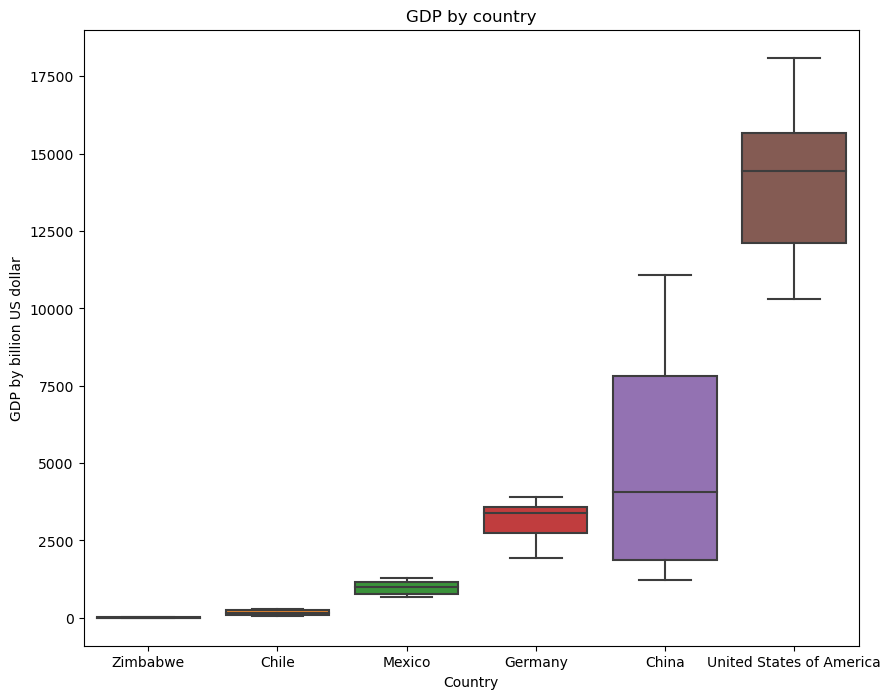

In [81]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Country', y='GDP', data=df_out, order=order1)
plt.ylabel('GDP by billion US dollar')
plt.title('GDP by country')
plt.show()

The average GDP of the USA is the highest, then China, and Germany. The range of GDP over time by country is the highest in China.

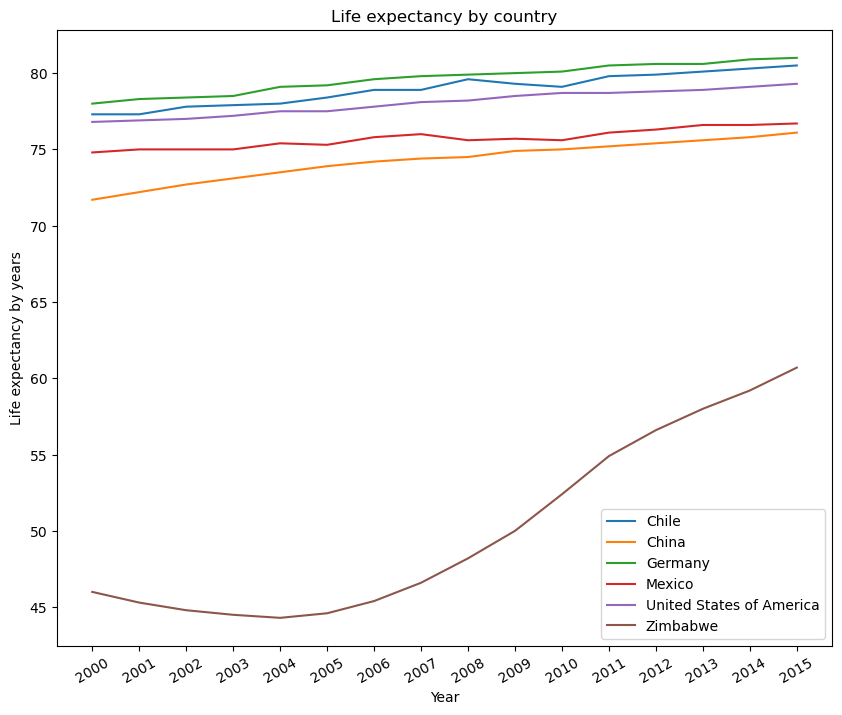

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Life expectancy at birth', hue='Country', data=df_out)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.title('Life expectancy by country')
plt.legend(loc='lower right')
plt.show()

The life expectancies of most countries are relatively high. The lowest life expectancy is observed in Zimbabwe. The increase of life expectancy in these countries varies. In Zimbabwe, the life expectancy has increased significantly compared to other countries. In Chile, China, Germany, Mexico, and the USA, the life expectancy is higher from the beginning and the increase in these countries is relatively small compared to Zimbabwe.

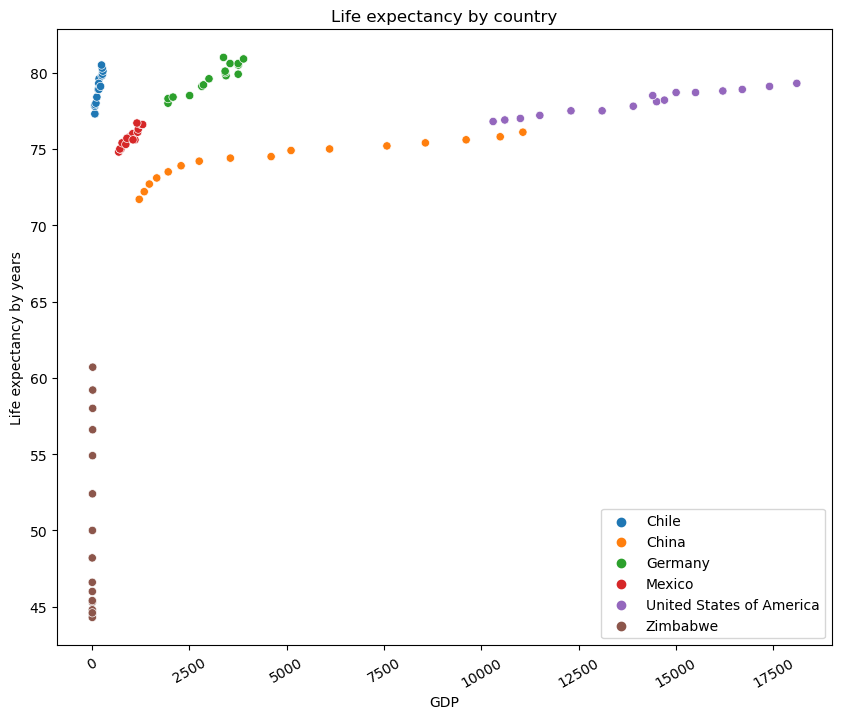

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GDP', y='Life expectancy at birth', hue='Country', data=df_out)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.title('Life expectancy by country')
plt.legend(loc='lower right')
plt.show()

<AxesSubplot:>

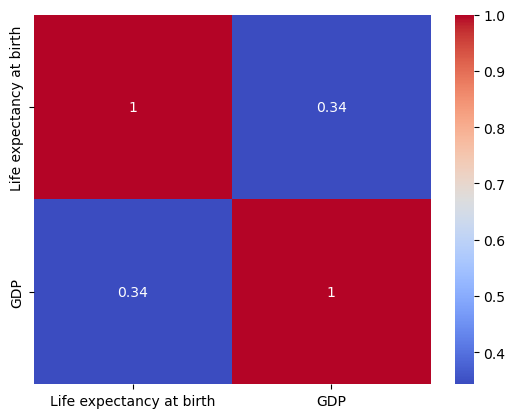

In [22]:
corr_mat = df_out.corr()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

The correlation parameter between GDP and life expectancy from our data indicates that there is not strong correlation between them. 

In [24]:
df_zimbabwe = df_out[df_out.Country == 'Zimbabwe']

In [25]:
df_zimbabwe

,Country,Year,Life expectancy at birth,GDP
81,Zimbabwe,2000,46.0,6.689958
82,Zimbabwe,2001,45.3,6.777385
83,Zimbabwe,2002,44.8,6.342116
84,Zimbabwe,2003,44.5,5.727592
85,Zimbabwe,2004,44.3,5.805598
86,Zimbabwe,2005,44.6,5.755215
87,Zimbabwe,2006,45.4,5.443897
88,Zimbabwe,2007,46.6,5.291950
89,Zimbabwe,2008,48.2,4.415703
90,Zimbabwe,2009,50.0,8.621574


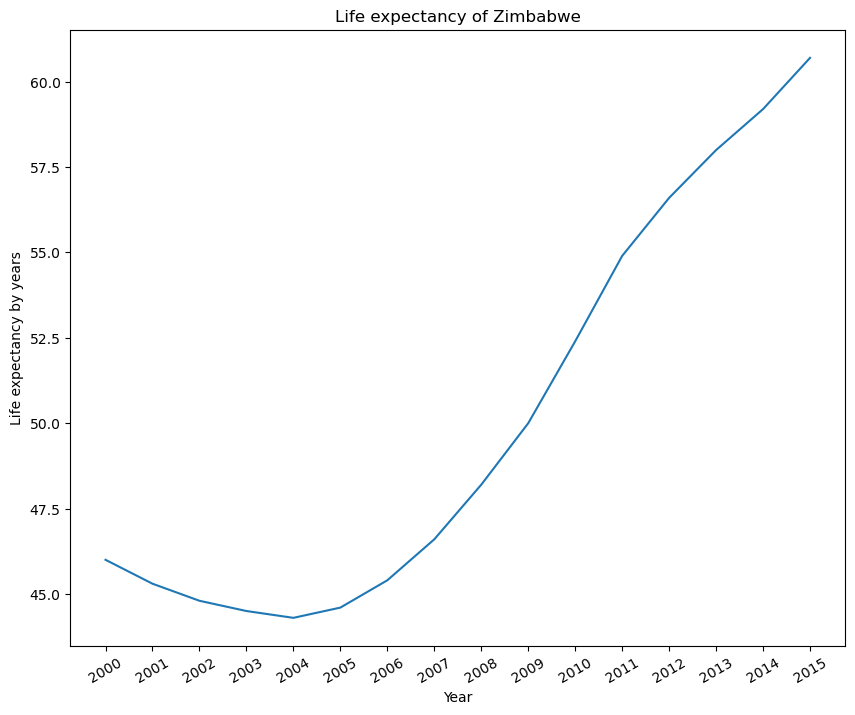

In [27]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Life expectancy at birth', data=df_zimbabwe)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.title('Life expectancy of Zimbabwe')
plt.show()

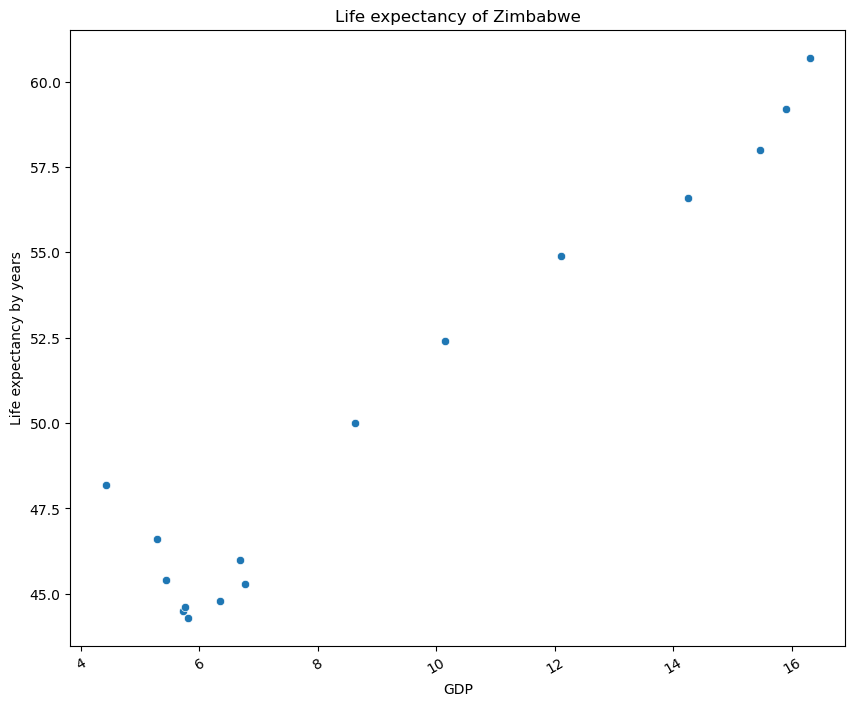

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GDP', y='Life expectancy at birth', data=df_zimbabwe)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.title('Life expectancy of Zimbabwe')
plt.show()

In [31]:
df_mexico = df_out[df_out.Country == 'Mexico']
df_mexico

,Country,Year,Life expectancy at birth,GDP
49,Mexico,2000,74.8,683.648
50,Mexico,2001,75.0,724.704
51,Mexico,2002,75.0,741.560
52,Mexico,2003,75.0,713.284
53,Mexico,2004,75.4,770.268
54,Mexico,2005,75.3,866.346
55,Mexico,2006,75.8,965.281
56,Mexico,2007,76.0,1043.470
57,Mexico,2008,75.6,1101.280
58,Mexico,2009,75.7,894.949


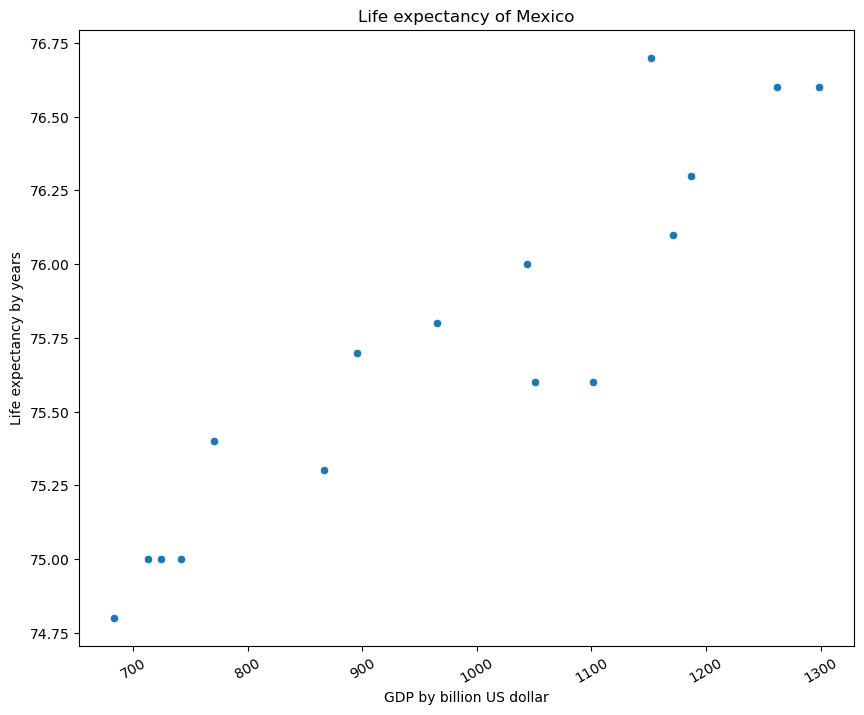

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GDP', y='Life expectancy at birth', data=df_mexico)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.xlabel('GDP by billion US dollar')
plt.title('Life expectancy of Mexico')
plt.show()

In [34]:
df_usa = df_out[df_out.Country == 'United States of America']
df_usa

,Country,Year,Life expectancy at birth,GDP
65,United States of America,2000,76.8,10300.0
66,United States of America,2001,76.9,10600.0
67,United States of America,2002,77.0,11000.0
68,United States of America,2003,77.2,11500.0
69,United States of America,2004,77.5,12300.0
70,United States of America,2005,77.5,13100.0
71,United States of America,2006,77.8,13900.0
72,United States of America,2007,78.1,14500.0
73,United States of America,2008,78.2,14700.0
74,United States of America,2009,78.5,14400.0


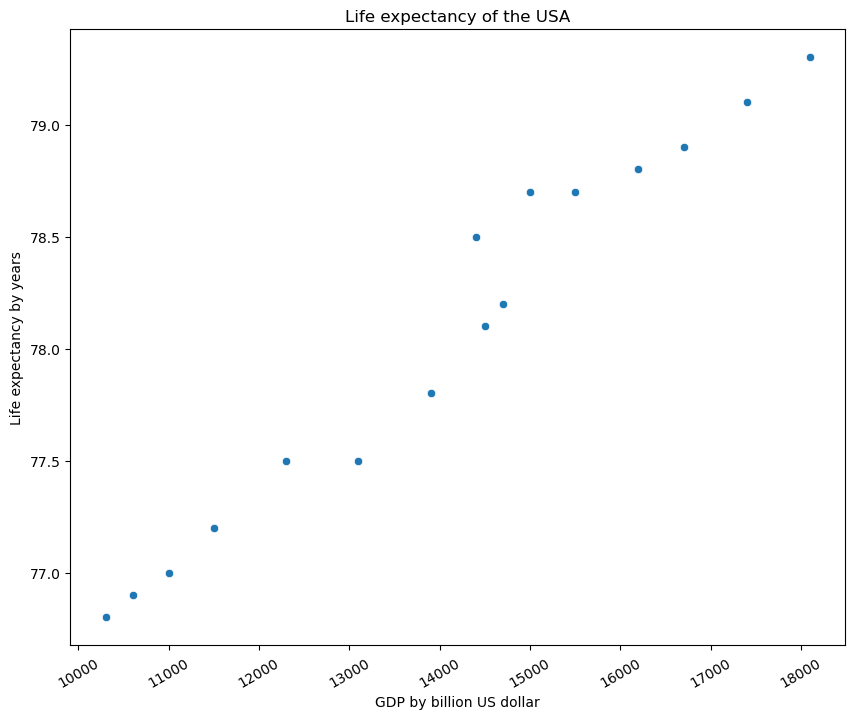

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GDP', y='Life expectancy at birth', data=df_usa)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy by years')
plt.xlabel('GDP by billion US dollar')
plt.title('Life expectancy of the USA')
plt.show()

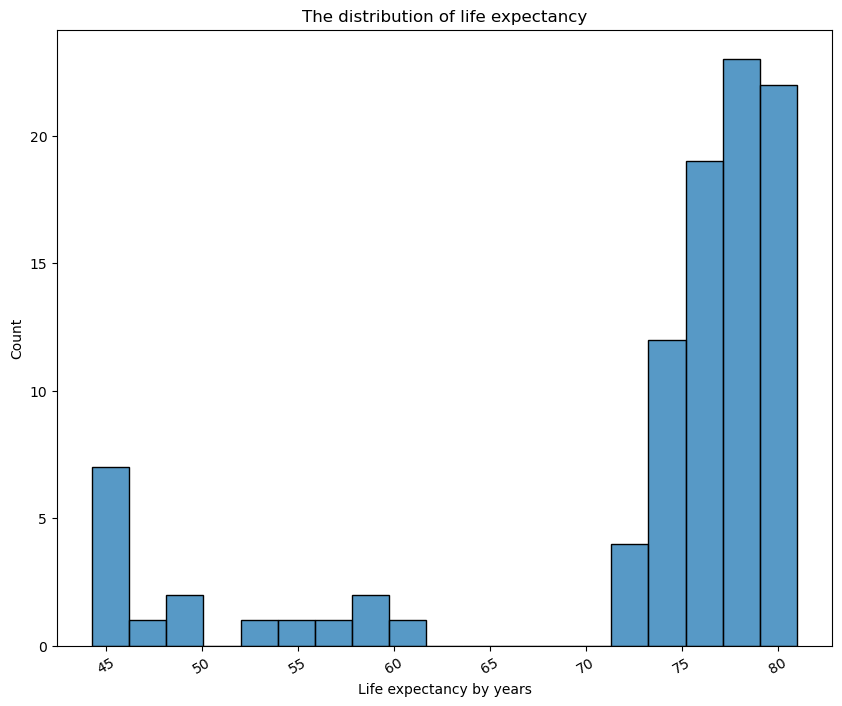

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(x='Life expectancy at birth', data=df_out)
plt.xticks(rotation=30)
plt.xlabel('Life expectancy by years')
plt.title('The distribution of life expectancy')
plt.show()

Conclusion

From our data, we can see that the GDP of each country increased over time with varying growth rate. The life expectancy of these countries increased over time as well. However, the most highest growth was observed in Zimbabwe from minimum being 44 to maximum being 60 years. For other countries, the average life expectancy was higher than Zimbabwe and the observed growth was relatively small compared to Zimbabwe. 
From our data, we could see that there was not strong correlation between GDP and life expectancy of countries.